In [52]:
import numpy as np

class KArmedBanditRecommender:
    def __init__(self, k, epsilon=0.1):
        self.k = k
        self.epsilon = epsilon
        self.counts = np.zeros(k)  # Count of times each item has been recommended
        self.values = np.zeros(k)  # Estimated reward values for each item
    
    def choose_item(self,it):
        if np.random.rand() < self.epsilon and it<400: #stopping exploration at later stages
            # Exploration: choose a random item
            return np.random.randint(0, self.k)
        else:
            # Exploitation: choose the item with the highest estimated value
            return np.argmax(self.values)
    
    def update(self, chosen_item, reward):
        # Update the count for the chosen item
        self.counts[chosen_item] += 1
        
        # Update the estimated value (running average) for the chosen item
        n = self.counts[chosen_item]
        value = self.values[chosen_item]
        # Incremental update of the average reward for the chosen item
        self.values[chosen_item] = value + (reward - value) / n
    
    def simulate_recommendations(self, n_rounds, true_rewards):
        rewards = []
        
        for i in range(n_rounds):
            # Step 1: Choose an item to recommend
            item = self.choose_item(i)
            
            # Step 2: Receive a reward based on the true reward distribution
            reward = np.random.normal(loc=true_rewards[item], scale=1e-4)  # Binary reward based on true probability
            rewards.append(reward)
            
            # Step 3: Update the reward estimate for the chosen item
            self.update(item, reward)
        
        return rewards

# Example usage
k = 10  # Number of items to recommend
epsilon = 0.2  # Exploration rate
n_rounds = 500  # Number of rounds 

# True average reward probabilities for each item 
true_rewards = [0.1, 0.3, 0.5, 0.8, 0.6, 0.2, 0.4, 0.6, 0.1, 0.3]


# Initialize the k-armed bandit recommender
bandit_recommender = KArmedBanditRecommender(k, epsilon)

# Simulate the recommendation process
rewards = bandit_recommender.simulate_recommendations(n_rounds, true_rewards)

# Calculate the average reward obtained
average_reward = np.mean(rewards)
print("Average reward over", n_rounds, "rounds:", average_reward)


Average reward over 500 rounds: 0.7391952749747898


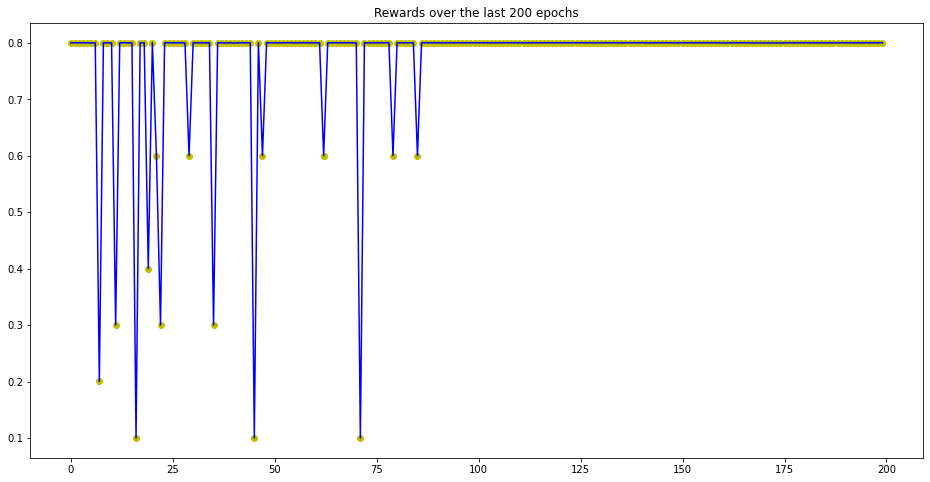

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.title("Rewards over the last 200 epochs")
plt.scatter(range(200),rewards[-200:],c="y")
plt.plot(range(200),rewards[-200:],c="b")

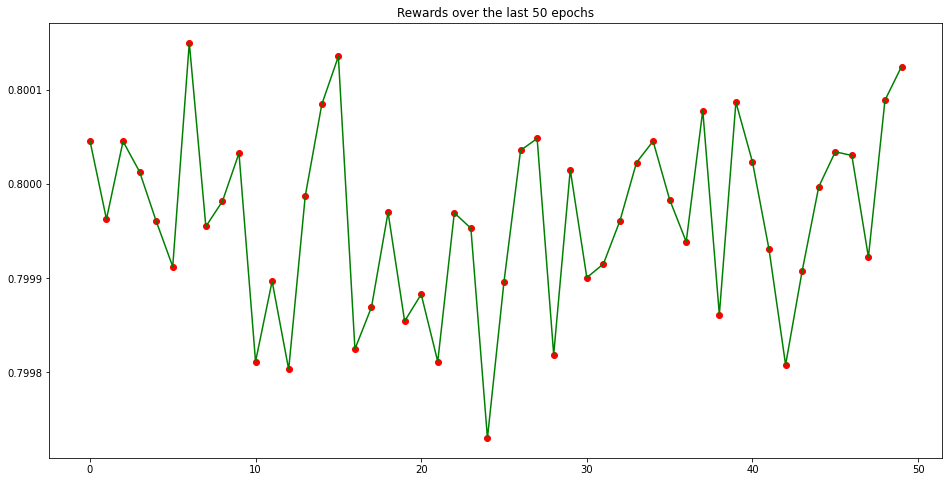

In [56]:
plt.figure(figsize=(16,8))
plt.title("Rewards over the last 50 epochs")
plt.scatter(range(50),rewards[-50:],c="r")
plt.plot(range(50),rewards[-50:],c="g")